# Model to detect incoming churn customer based on credit info

In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [95]:
plt.style.use('ggplot')

In [96]:
df = pd.read_csv('data/credit.csv')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


There is:
- 165k records
- 14 non-null columns
- 3 id cols (id, CustomerId, Surname)
- 10 feature cols (2 is categorical feature)
- 1 target col (Exited)

# Define cols variables

In [98]:
col_target = 'Exited'
cols_id = ['id', 'CustomerId', 'Surname']
cols_feature = list(df.drop([col_target] + cols_id, axis = 1).columns)

In [99]:
cols_feature_cat = list(df[cols_feature].select_dtypes('object').columns)
cols_feature_num = [col for col in cols_feature if col not in cols_feature_cat]
print(f"Numeric features: {cols_feature_num} ")
print(f"Categorical features: {cols_feature_cat}")

Numeric features: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'] 
Categorical features: ['Geography', 'Gender']


# EDA

## Univariate 

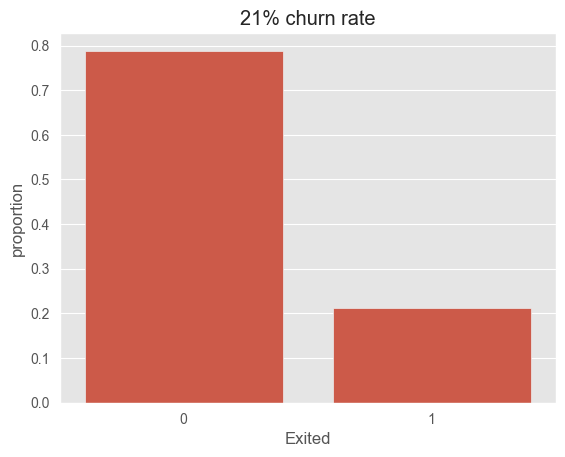

In [100]:
sns.barplot(
    df[col_target].value_counts(normalize=True),
).set(
    title = f"{df[col_target].mean()*100:,.0f}% churn rate"
)
plt.show()

### Categorical features

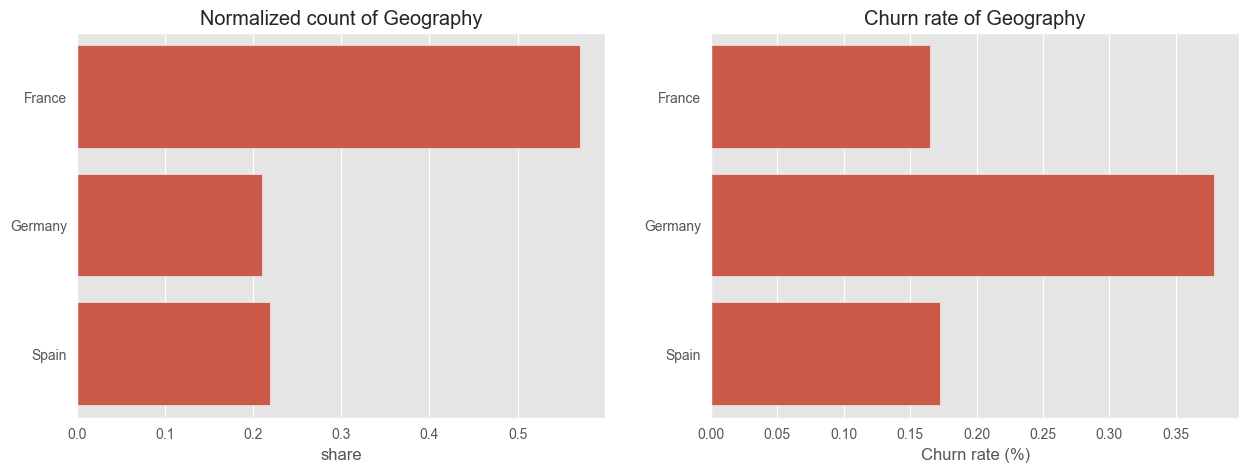

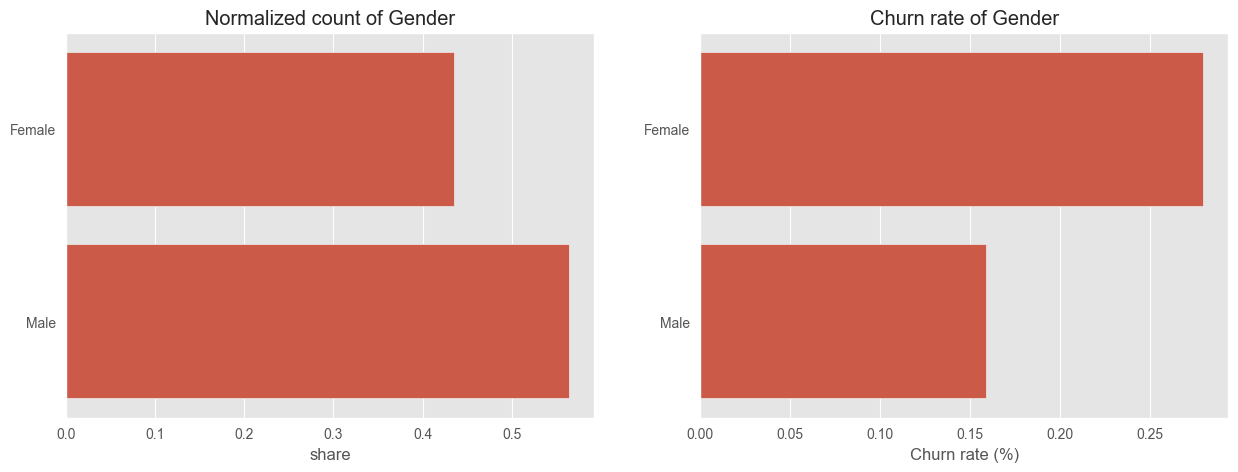

In [101]:
for col in cols_feature_cat:
    fig, (ax_count, ax_target) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
    
    sns.barplot(
        df[col].value_counts(normalize = True).sort_index(), 
        orient = 'h',
        ax = ax_count
    ).set(
        title = f'Normalized count of {col}', 
        ylabel = '',
        xlabel = 'share'
    )
    
    sns.barplot(
        df.groupby(col)[col_target].mean().sort_index(), 
        orient = 'h',
        ax = ax_target
    ).set(
        title = f'Churn rate of {col}', 
        ylabel = '',
        xlabel = f"Churn rate (%)",
    )
    plt.show()

### Numeric features

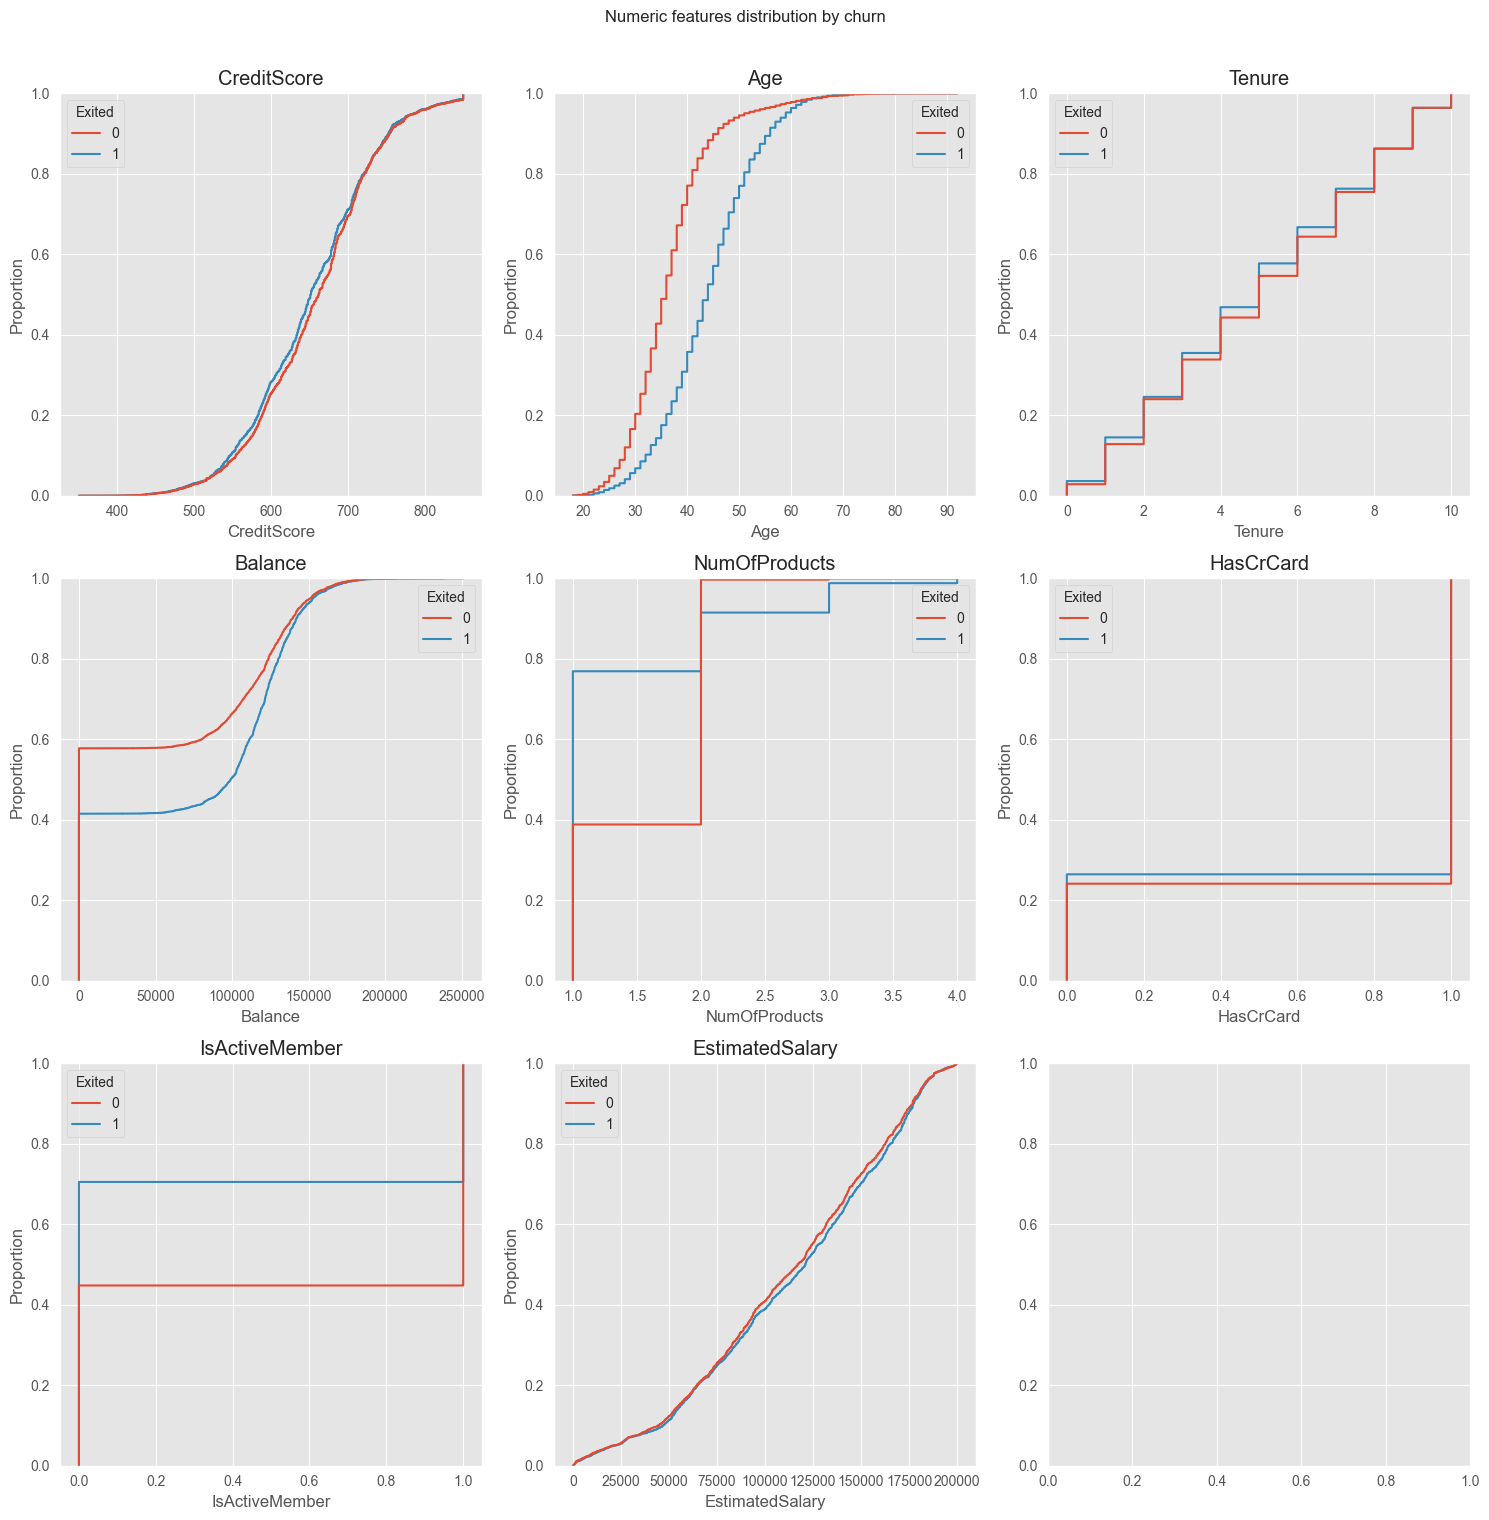

In [105]:
cnt_cols = 3
cnt_rows = len(cols_feature_num)//cnt_cols + 1
fig, axes = plt.subplots(nrows = cnt_rows, ncols = cnt_cols, figsize = (15, 15))
for ax, col in zip(axes.flatten(), cols_feature_num):
    sns.ecdfplot(
        data = df,
        x = col,
        hue = col_target,
        ax = ax
    )
    ax.set_title(col)
fig.suptitle("Numeric features distribution by churn", y=1.01)
fig.tight_layout()
plt.show()

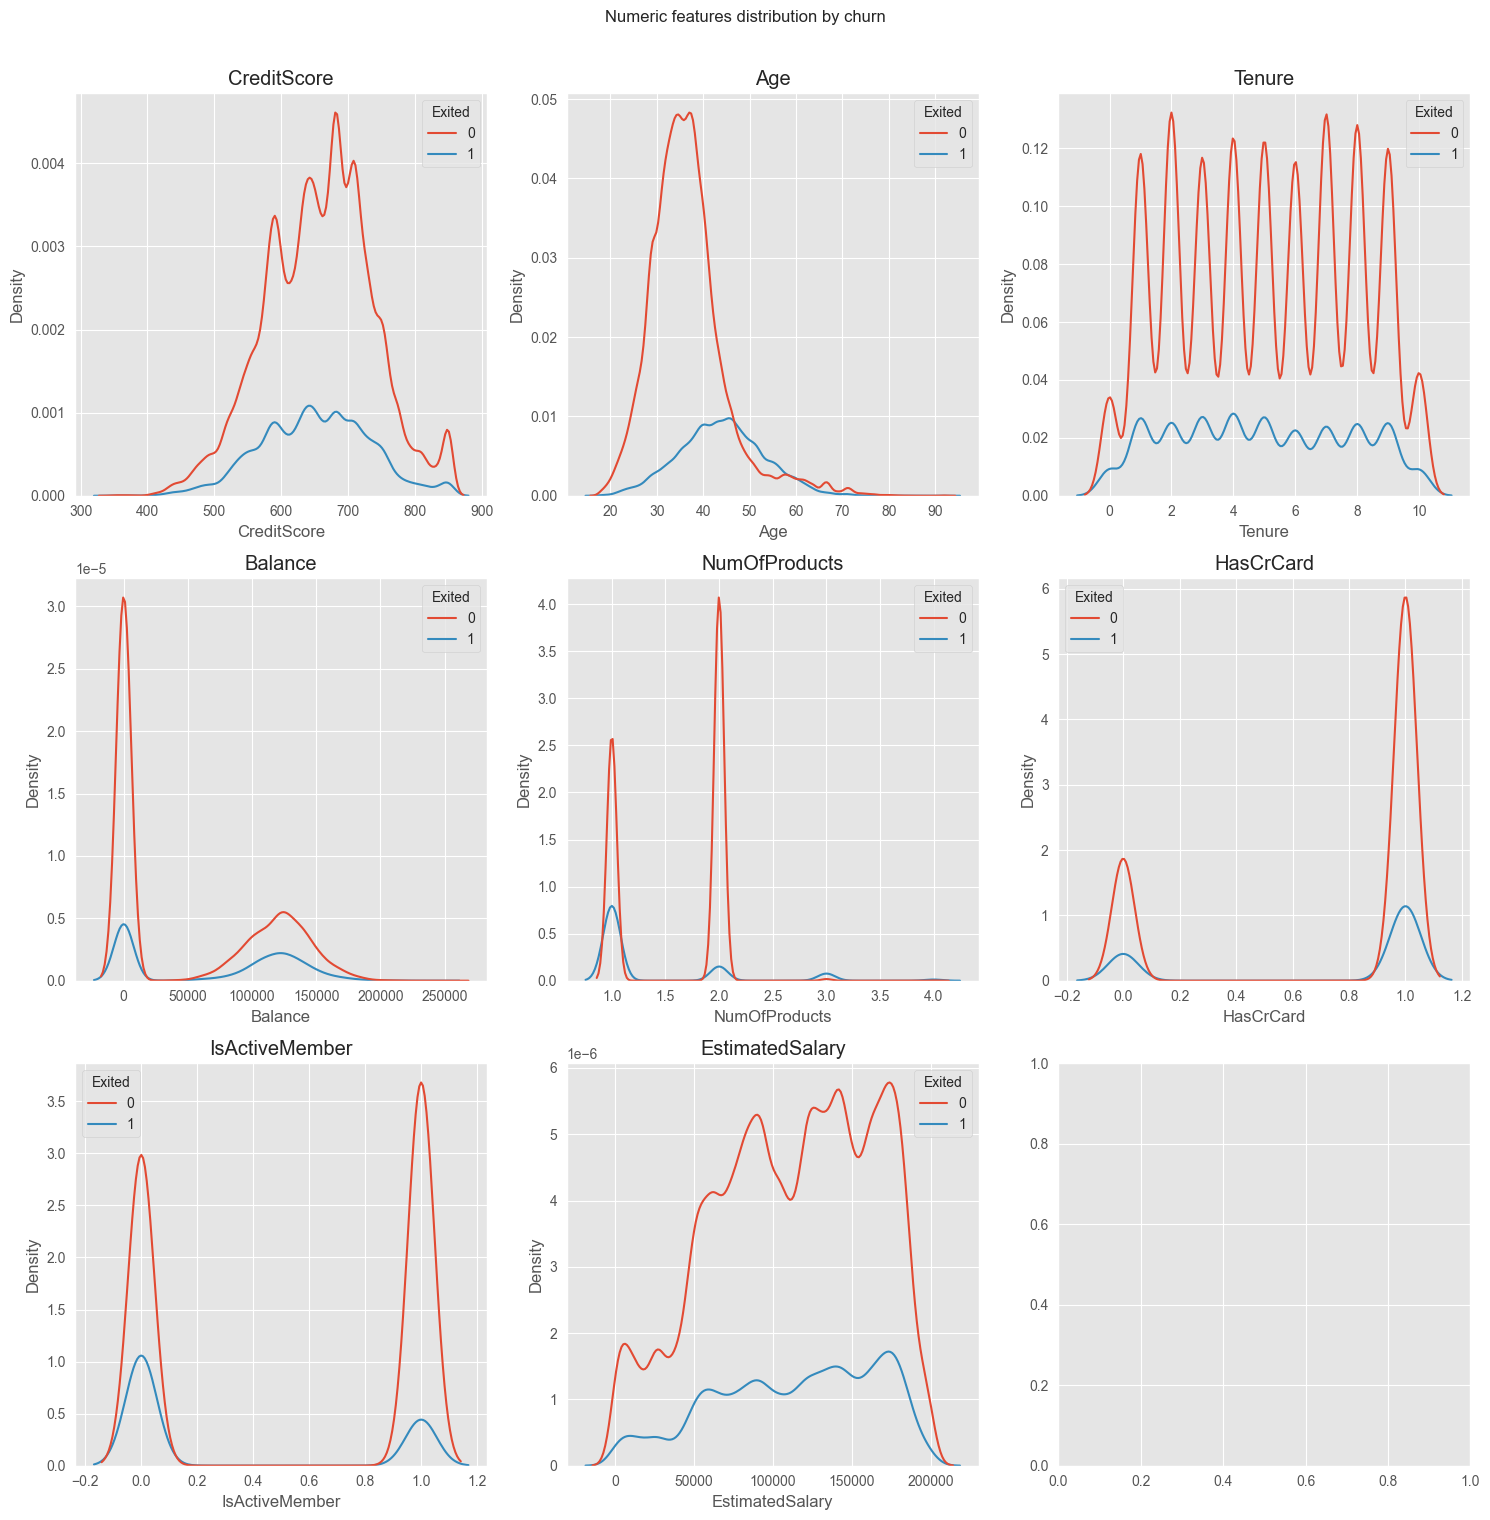

In [129]:
cnt_cols = 3
cnt_rows = len(cols_feature_num)//cnt_cols + 1
fig, axes = plt.subplots(nrows = cnt_rows, ncols = cnt_cols, figsize = (15, 15))
for ax, col in zip(axes.flatten(), cols_feature_num):
    sns.kdeplot(
        data = df,
        x = col,
        hue = col_target,
        ax = ax
    )
    ax.set_title(col)
fig.suptitle("Numeric features distribution by churn", y=1.01)
fig.tight_layout()
plt.show()

## Bivariate

### Cat features vs. Num features

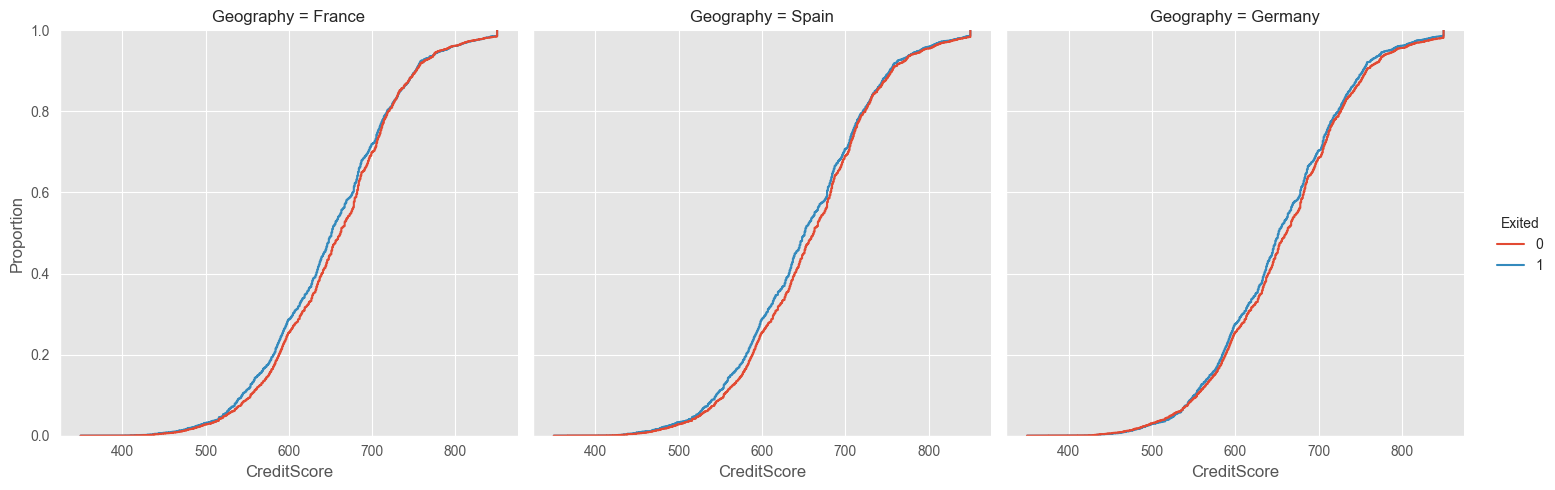

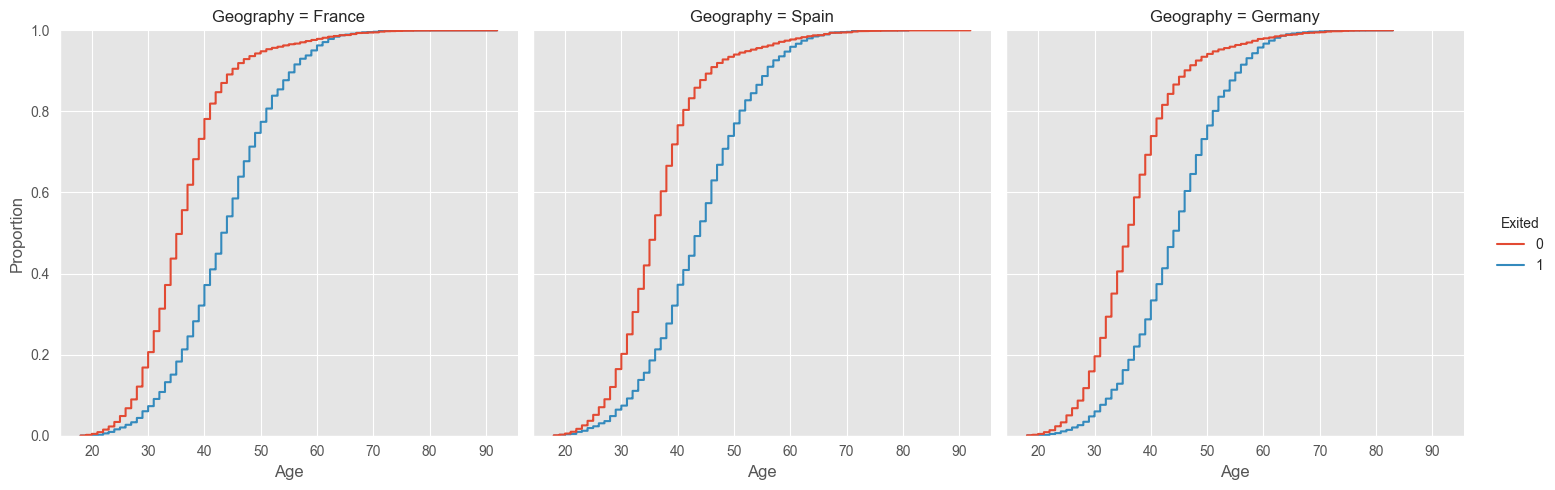

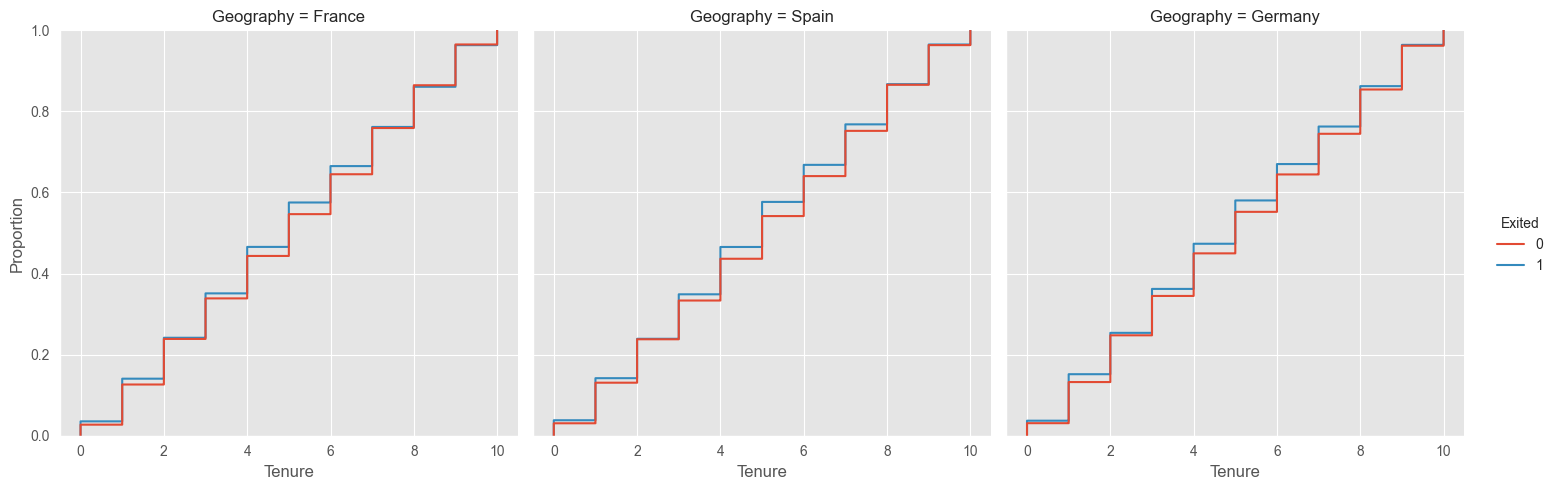

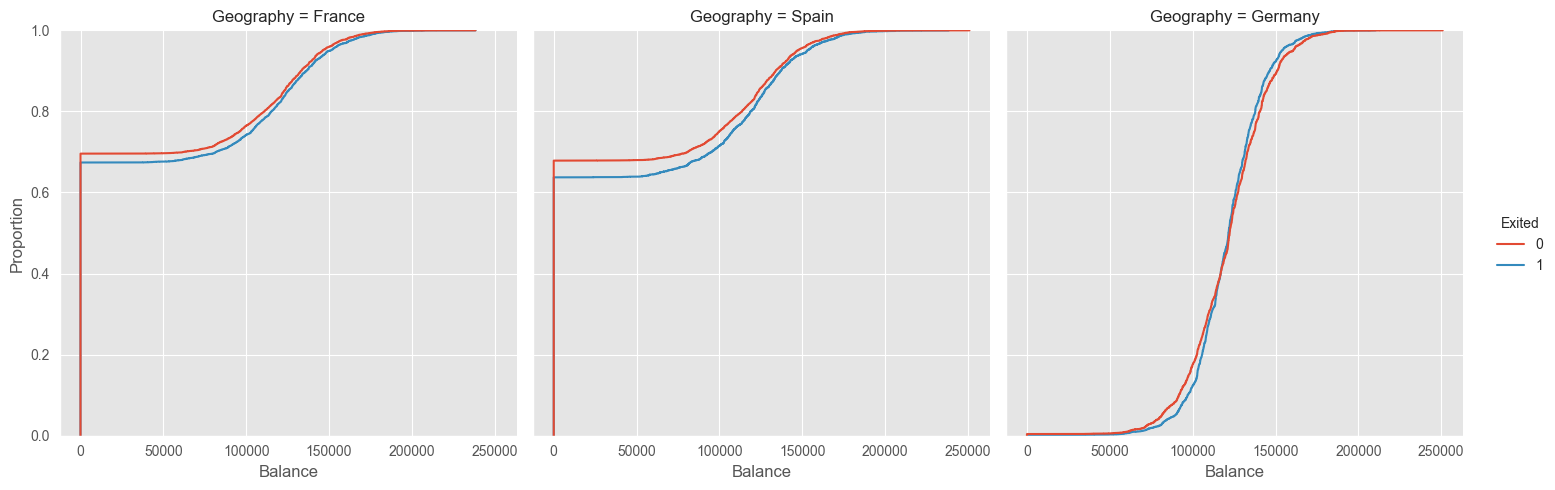

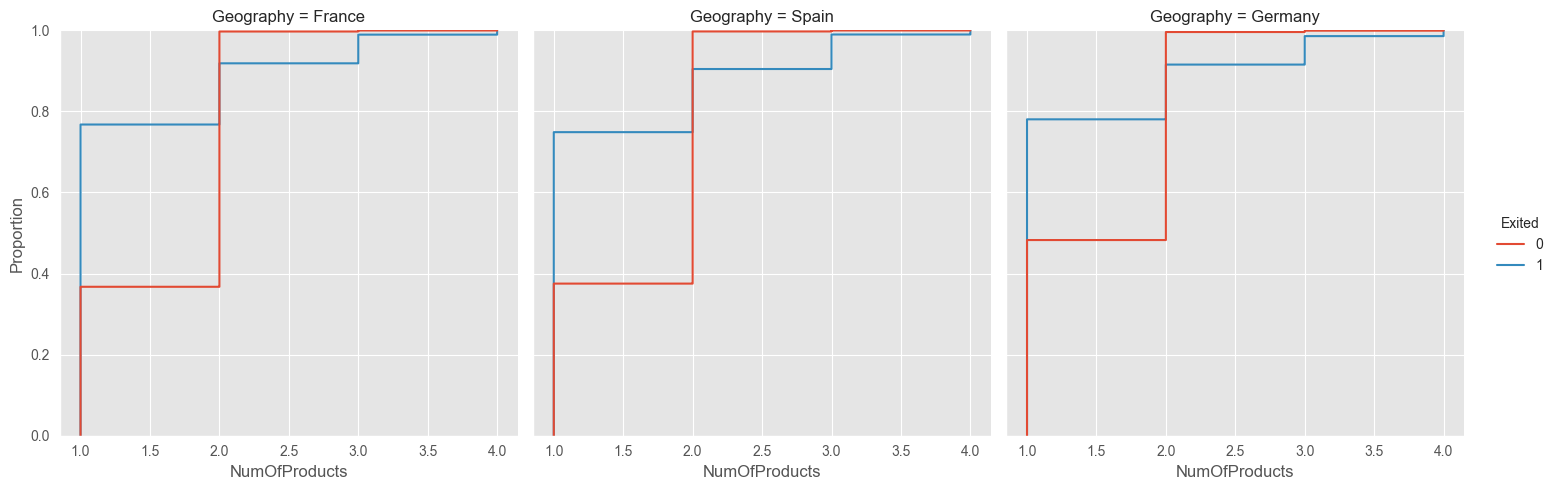

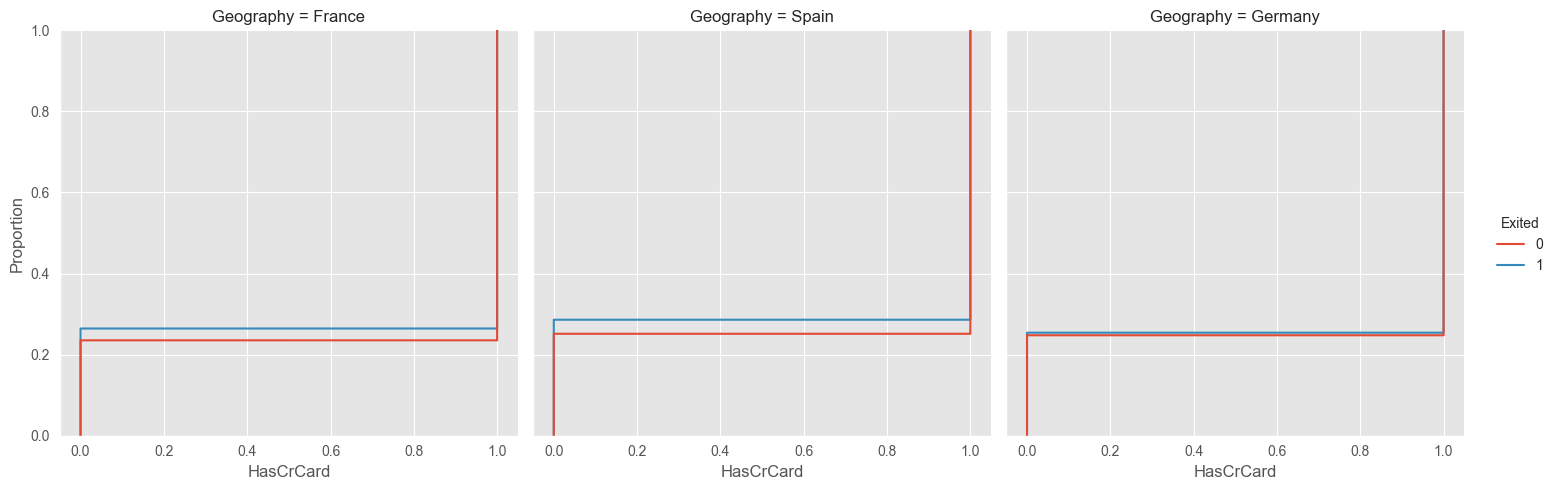

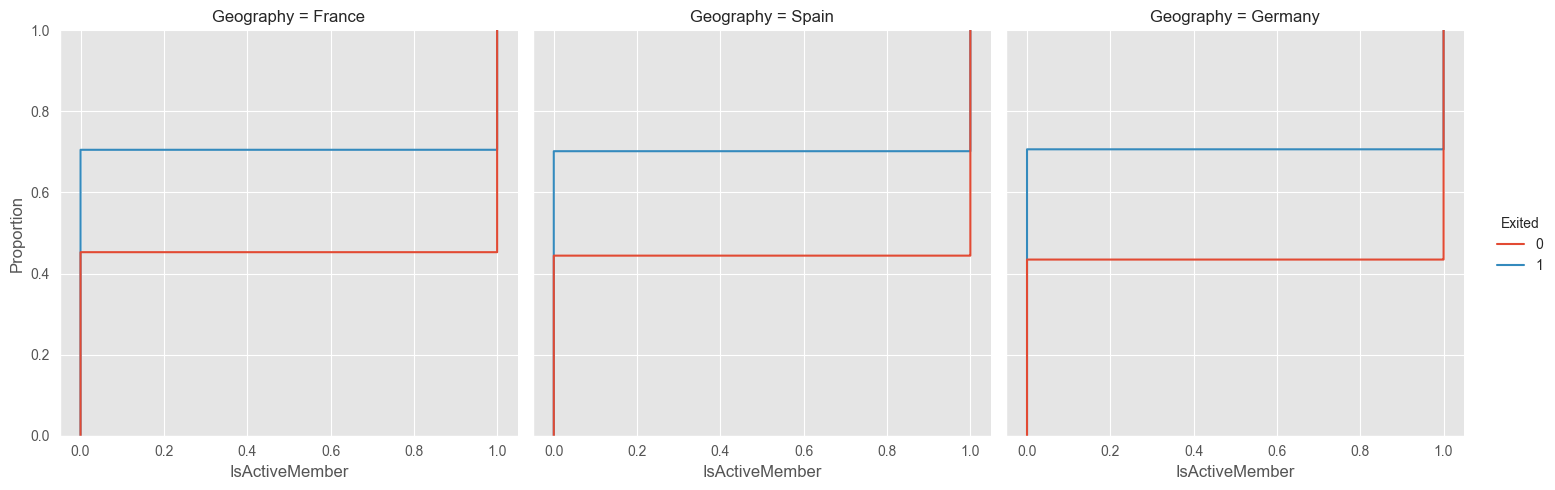

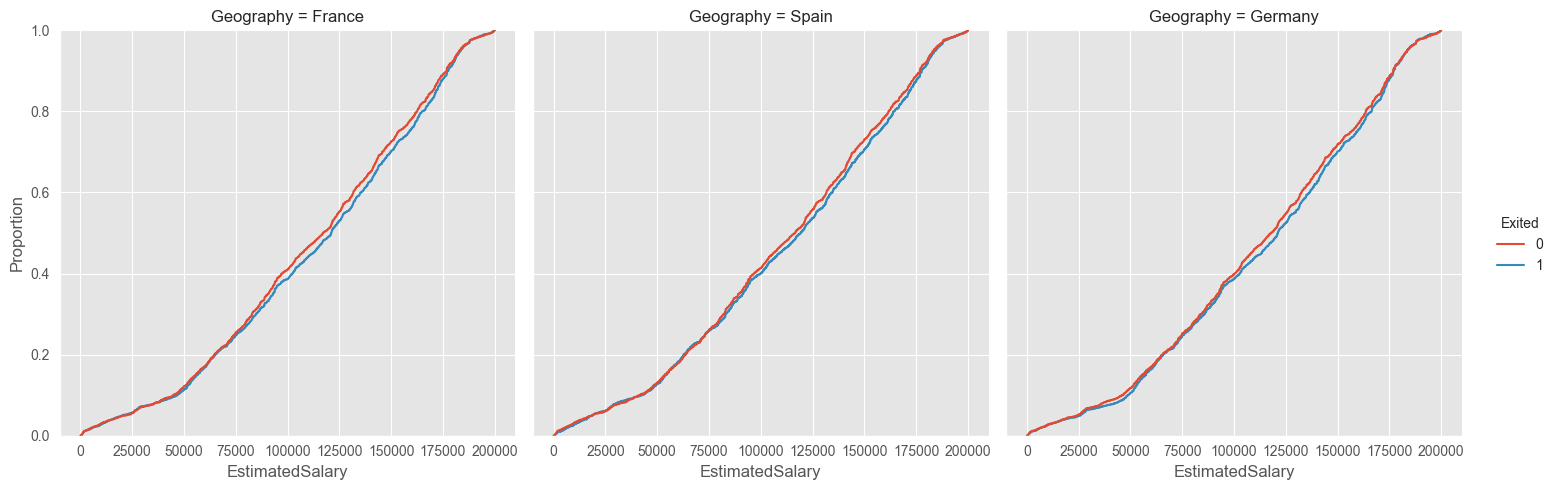

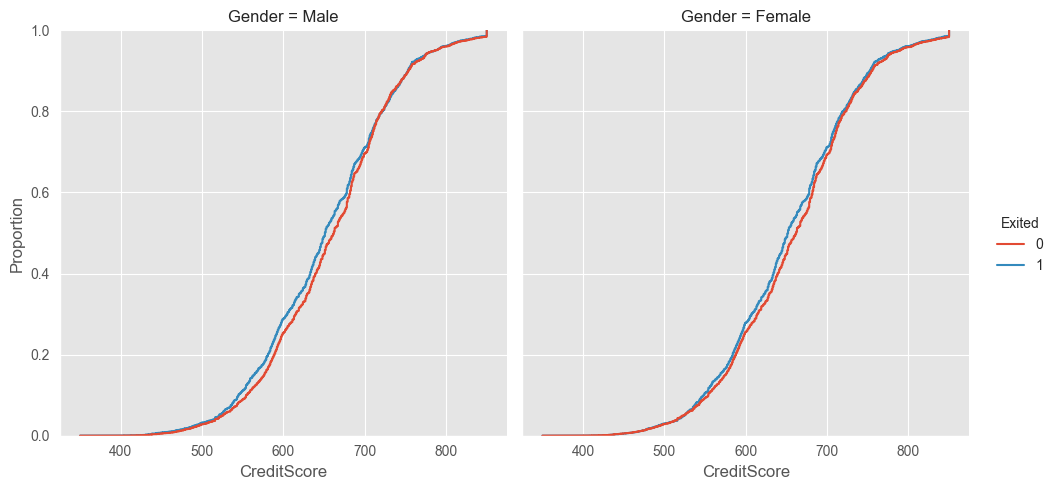

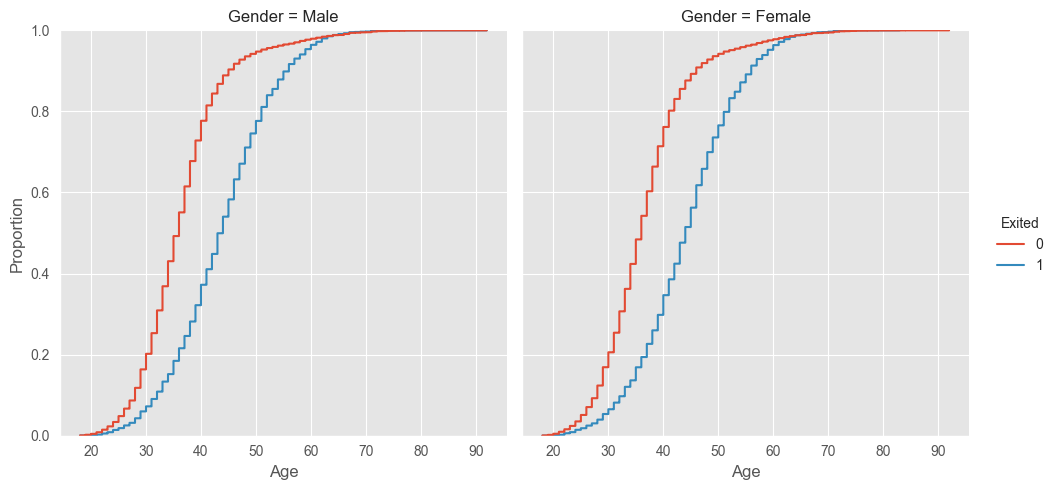

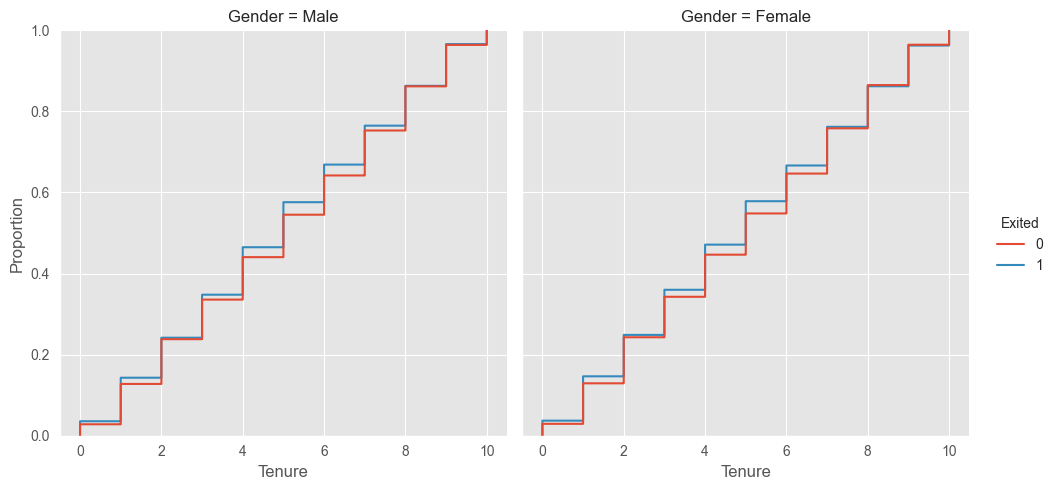

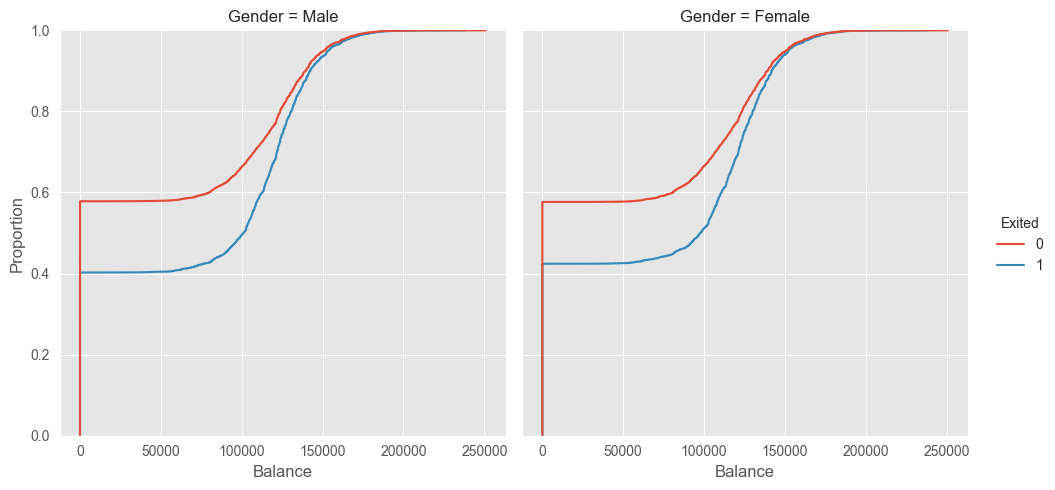

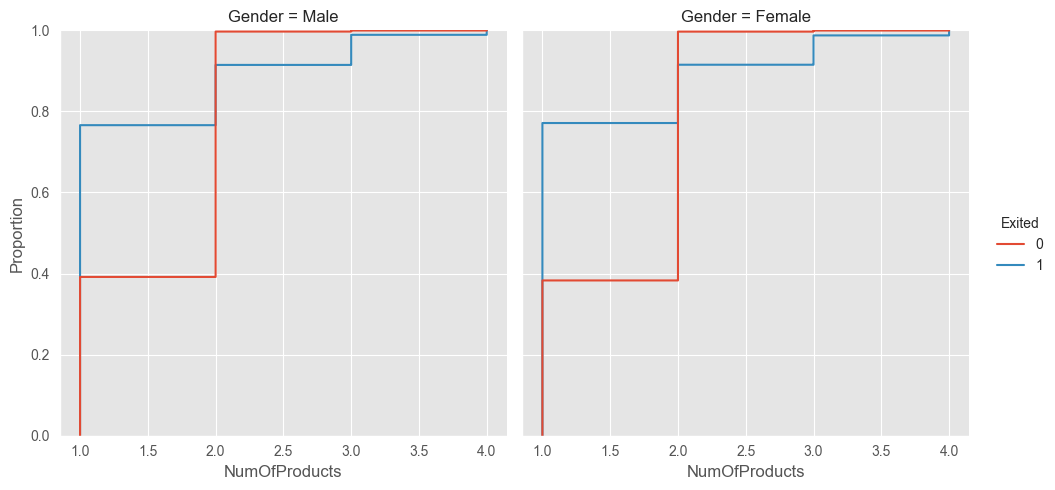

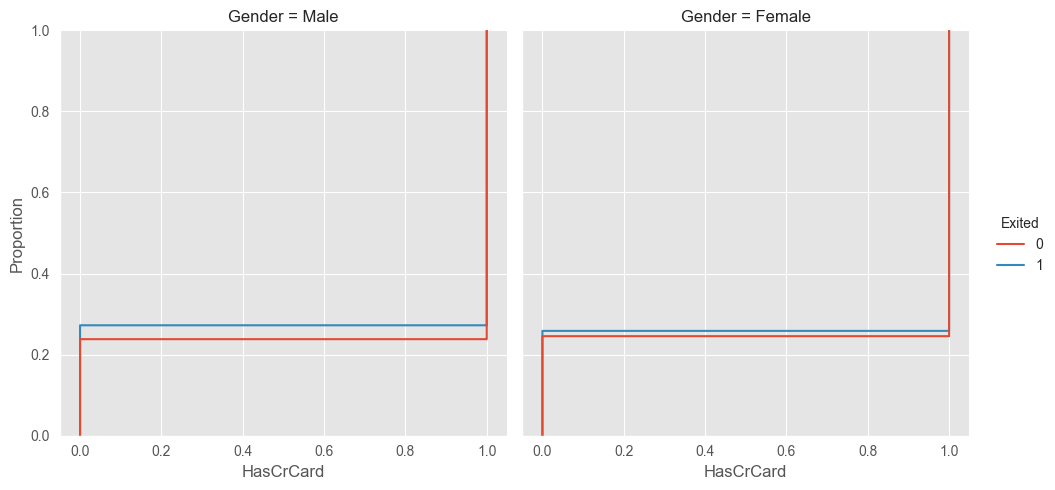

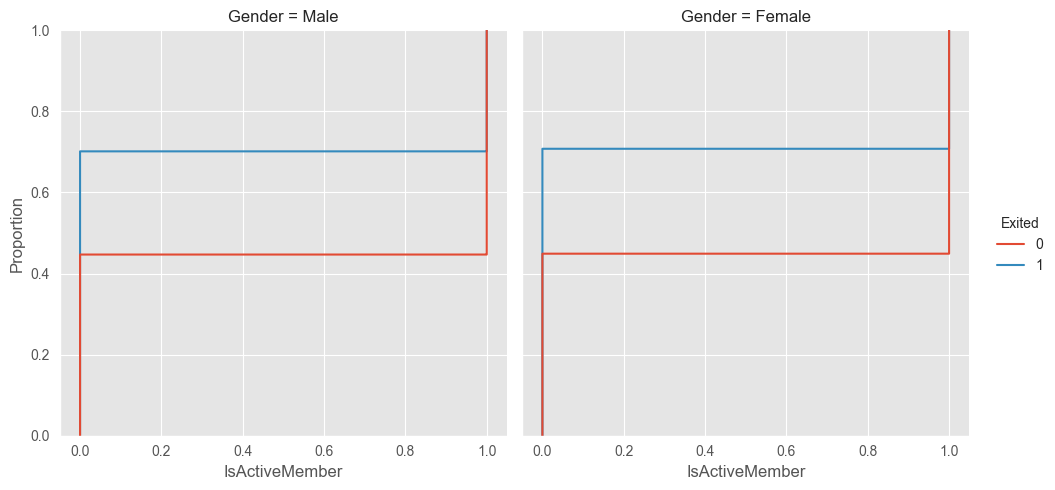

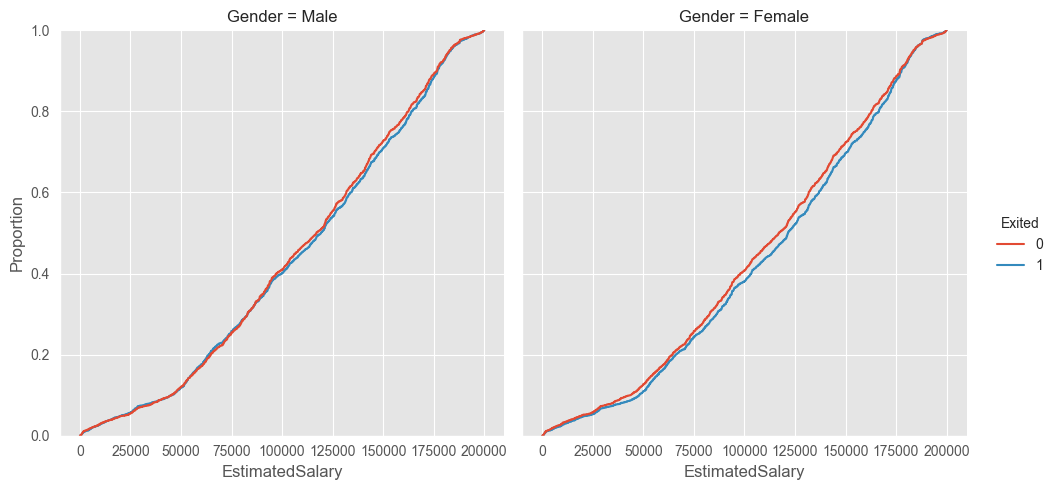

In [104]:
for col_cat in cols_feature_cat:
 
    cnt_cols  = df[col_cat].nunique()
    cnt_rows = len(cols_feature_num)
    for ax, col_num in zip(axes.flatten(), cols_feature_num):
        sns.displot(
            data = df,
            col = col_cat,
            x = col_num,
            hue = col_target,
            kind = 'ecdf',
        )
        plt.show()

### Num features vs. Num features

In [118]:
from sklearn.preprocessing import PowerTransformer
df_tf = pd.DataFrame(
    PowerTransformer(method='yeo-johnson').fit_transform(df[cols_feature_num]),
    columns = cols_feature_num
)
df_tf = pd.concat([df_tf, df[col_target]], axis=1)

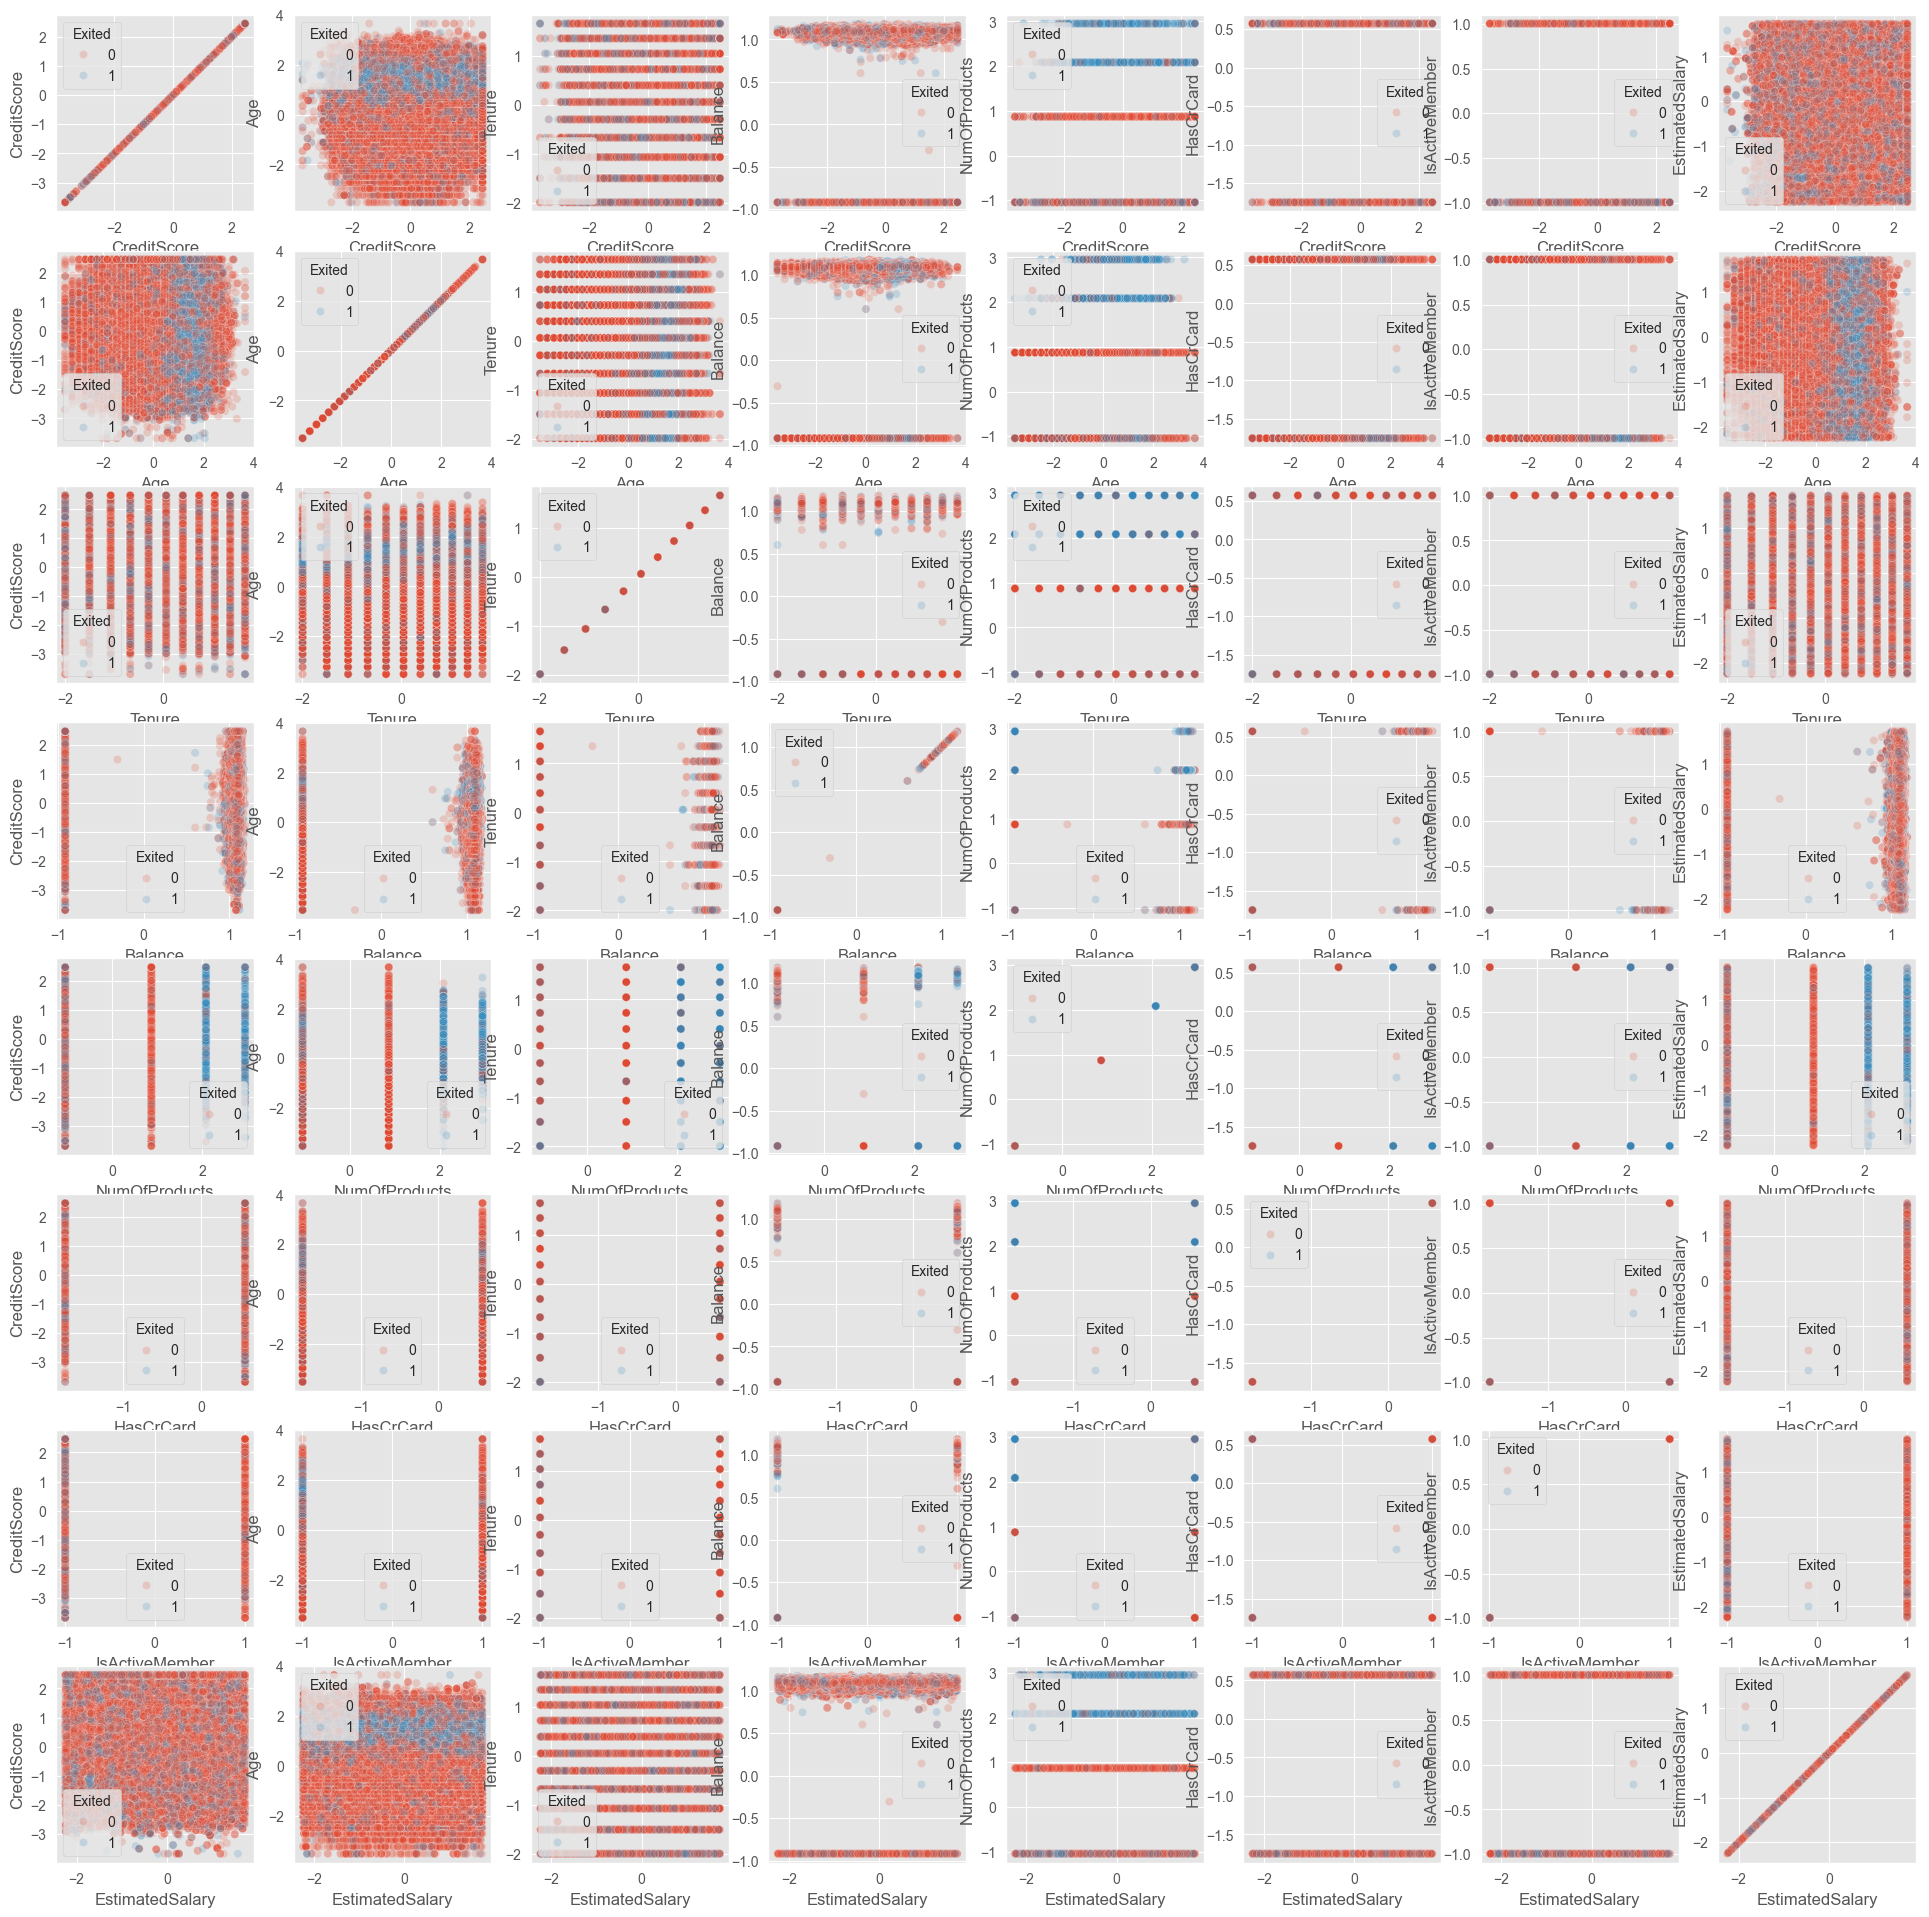

In [128]:
n_rows = len(cols_feature_num)
n_cols = len(cols_feature_num)
fig, axes = plt.subplots(nrows = n_rows, ncols = n_cols, figsize = (3 * n_rows, 3 * n_cols))
for i, col_num_1 in enumerate(cols_feature_num):
    for j, col_num_2 in enumerate(cols_feature_num):
        sns.scatterplot(
            data = df_tf, 
            x = col_num_1,
            y = col_num_2,
            hue = col_target,
            ax = axes[i, j],
            alpha = 0.2
        )
plt.show()     